<a href="https://colab.research.google.com/github/sapisfun/learnGenAI/blob/main/Book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as T


In [ ]:
torch.manual_seed(42)
transform = T.Compose([T.ToTensor(),T.Normalize([0.5],[0.5]) ])

In [ ]:
import torchvision
train_set= torchvision.datasets.FashionMNIST(
 root=".",
 train=True,
 download=True,
 transform=transform)
test_set= torchvision.datasets.FashionMNIST(root=".",
 train=False,download=True,transform=transform)

100%|██████████| 26.4M/26.4M [00:01<00:00, 13.2MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 212kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.90MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.63MB/s]


In [ ]:
print(train_set[0][1])

9


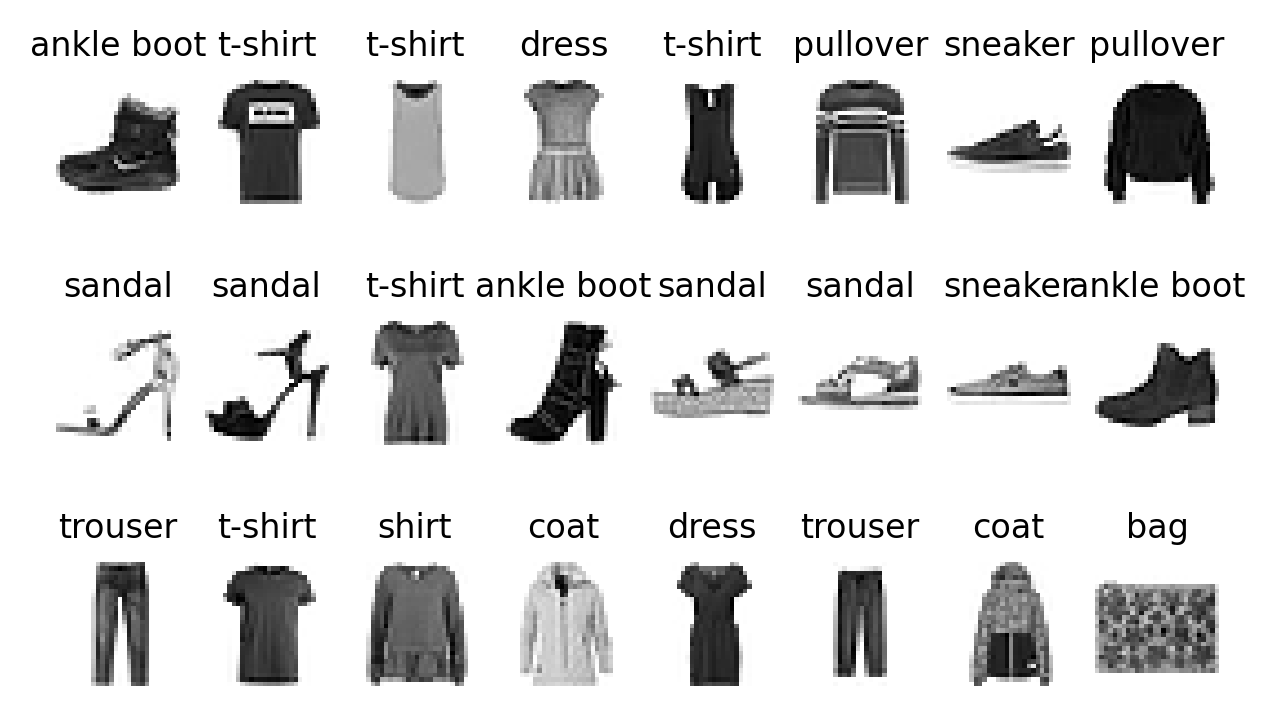

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=300,figsize=(5,4))
text_labels=['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

for i in range(24):
 ax=plt.subplot(4, 8, i + 1)
 img=train_set[i][0]
 img=img/2+0.5
 img=img.reshape(28, 28)
 plt.imshow(img,
 cmap="binary")
 plt.axis('off')
 plt.title(text_labels[train_set[i][1]],
 fontsize=8)
plt.show()

In [ ]:
binary_train_set=[x for x in train_set if x[1] in [0,9]]
# binary_train_set

In [ ]:
binary_test_set=[x for x in test_set if x[1] in [0,9]]


In [ ]:
batch_size=64
binary_train_loader=torch.utils.data.DataLoader(
 binary_train_set,batch_size=batch_size,
 shuffle=True)
binary_test_loader=torch.utils.data.DataLoader(
 binary_test_set,
 batch_size=batch_size,shuffle=True)

In [ ]:
import torch.nn as nn
device="cuda" if torch.cuda.is_available() else "cpu"
binary_model=nn.Sequential(
 nn.Linear(28*28,256),
 nn.ReLU(),
 nn.Linear(256,128),
 nn.ReLU(),
 nn.Linear(128,32),
 nn.ReLU(),
 nn.Linear(32,1),
 nn.Dropout(p=0.25),
 nn.Sigmoid()).to(device)

In [ ]:
lr=0.001
optimizer=torch.optim.Adam(binary_model.parameters(),lr=lr)
loss_fn=nn.BCELoss()

In [ ]:
for i in range(50):
  tloss=0
  for imgs,labels in binary_train_loader:
    imgs=imgs.reshape(-1,28*28)
    imgs=imgs.to(device)
    labels=torch.FloatTensor(\
    [x if x==0 else 1 for x in labels])
    labels=labels.reshape(-1,1).to(device)
    preds=binary_model(imgs)
    loss=loss_fn(preds,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    tloss+=loss.detach()
  tloss=tloss/50
  print(f"at epoch {i}, loss is {tloss}")

at epoch 0, loss is 0.7275145649909973
at epoch 1, loss is 0.6672496795654297
at epoch 2, loss is 0.6683082580566406
at epoch 3, loss is 0.6685730814933777
at epoch 4, loss is 0.6433091759681702
at epoch 5, loss is 0.6632858514785767
at epoch 6, loss is 0.6647137403488159
at epoch 7, loss is 0.6570886373519897
at epoch 8, loss is 0.6515321135520935
at epoch 9, loss is 0.649484395980835
at epoch 10, loss is 0.6591164469718933
at epoch 11, loss is 0.6671627759933472
at epoch 12, loss is 0.6385668516159058
at epoch 13, loss is 0.6437664031982422
at epoch 14, loss is 0.6738719344139099
at epoch 15, loss is 0.6643396615982056
at epoch 16, loss is 0.6424617767333984
at epoch 17, loss is 0.636613130569458
at epoch 18, loss is 0.6485266089439392
at epoch 19, loss is 0.6498258709907532
at epoch 20, loss is 0.6402952075004578
at epoch 21, loss is 0.6359626650810242
at epoch 22, loss is 0.6517754197120667
at epoch 23, loss is 0.6699703931808472
at epoch 24, loss is 0.6461434364318848
at epoch 25,

In [ ]:
import numpy as np
results=[]
for imgs,labels in binary_test_loader:
 imgs=imgs.reshape(-1,28*28).to(device)
 labels=(labels/9).reshape(-1,1).to(device)
 preds=binary_model(imgs)
 pred10=torch.where(preds>0.5,1,0)
 correct=(pred10==labels)
 results.append(correct.detach().cpu()\
 .numpy().mean())
accuracy=np.array(results).mean()
print(f"the accuracy of the predictions is {accuracy}")

the accuracy of the predictions is 0.880859375


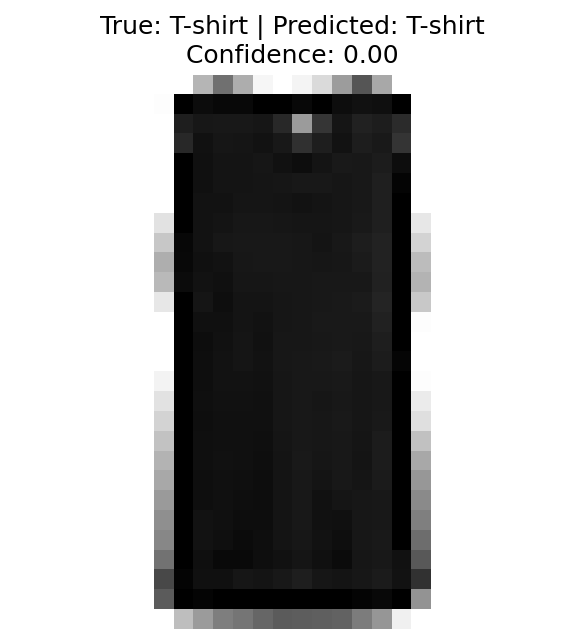

True label: T-shirt (value: 0)
Predicted: T-shirt
Confidence: 0.000
-> CORRECT


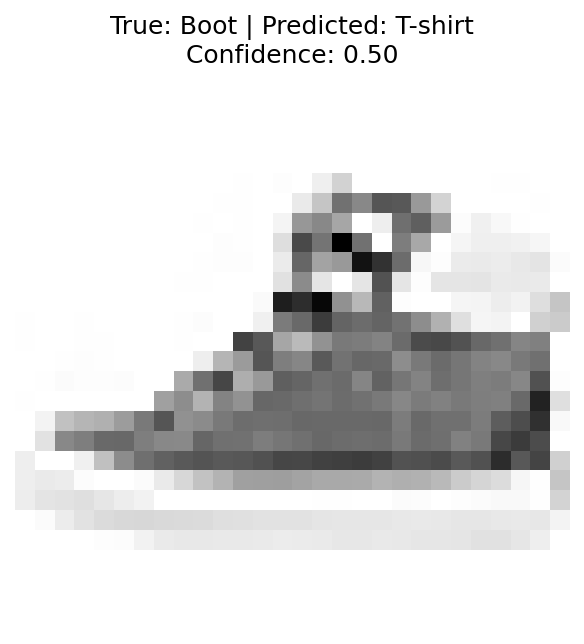

True label: Boot (value: 9)
Predicted: T-shirt
Confidence: 0.500
-> WRONG


In [ ]:
# After training your model, let's test on specific images
def predict_single_image(model, dataset, index):
    # Get the image and true label
    image, true_label = dataset[index]

    # Prepare the image for prediction
    image_input = image.reshape(1, -1).to(device)  # Reshape to (1, 784)

    # Make prediction
    with torch.no_grad():  # No need to calculate gradients for prediction
        prediction = model(image_input)
        probability = prediction.item()
        predicted_class = "Boot" if probability > 0.5 else "T-shirt"

    # Get true class name
    true_class = "Boot" if true_label == 9 else "T-shirt"

    # Display the image
    plt.figure(dpi=150)
    img_display = image / 2 + 0.5  # Reverse normalization for display
    img_display = img_display.reshape(28, 28)
    plt.imshow(img_display, cmap="binary")
    plt.axis('off')
    plt.title(f"True: {true_class} | Predicted: {predicted_class}\nConfidence: {probability:.2f}")
    plt.show()

    print(f"True label: {true_class} (value: {true_label})")
    print(f"Predicted: {predicted_class}")
    print(f"Confidence: {probability:.3f}")
    print(f"-> {'CORRECT' if predicted_class == true_class else 'WRONG'}")

# Test it on specific indices from your test set
predict_single_image(binary_model, binary_test_set, 3)  # First test image
predict_single_image(binary_model, binary_test_set, 8) # Another test image

#MultiClassification Experiment

In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"
model = nn.Sequential(
    nn.Linear(28*28, 256),
    nn.ReLU( ),
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10)
).to(device)

Split for Training and Validation

In [ ]:
train_set,val_set=torch.utils.data.random_split(\
 train_set,[50000,10000])

Define a batch size

In [ ]:
batch_size=64

Data loader for Train, Vlaidation and Testing

In [ ]:
train_loader=torch.utils.data.DataLoader(
 train_set,
 batch_size=batch_size,
 shuffle=True)

val_loader=torch.utils.data.DataLoader(
 val_set,
 batch_size=batch_size,
 shuffle=True)

test_loader=torch.utils.data.DataLoader(
 test_set,
 batch_size=batch_size,
 shuffle=True)

Early Stop function definition to stop model training

In [ ]:
class EarlyStop:
  def __init__(self, patience=10):
    self.patience = patience
    self.steps = 0
    self.min_loss = float('inf')
  def stop(self, val_loss):
    if val_loss < self.min_loss:
      self.min_loss = val_loss
      self.steps = 0
    elif val_loss >= self.min_loss:
      self.steps += 1
    if self.steps >= self.patience:
     return True
    else:
      return False
stopper=EarlyStop()

Training Model function

In [ ]:
def train_epoch():
  tloss=0
  for n,(imgs,labels) in enumerate(train_loader):
    imgs=imgs.reshape(-1,28*28).to(device)
    labels=labels.reshape(-1,).to(device)
    preds=model(imgs)
    loss=loss_fn(preds,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    tloss+=loss.detach()
  return tloss/n

Validation Model function

In [ ]:
def val_epoch():
  vloss=0
  for n,(imgs,labels) in enumerate(val_loader):
    imgs=imgs.reshape(-1,28*28).to(device)
    labels=labels.reshape(-1,).to(device)
    preds=model(imgs)
    loss=loss_fn(preds,labels)
    vloss+=loss.detach()
  return vloss/n

Hyperparameter and loss function

In [ ]:
lr=0.001
optimizer=torch.optim.Adam(model.parameters(),lr=lr)
loss_fn=nn.CrossEntropyLoss()

Model Training Process

In [ ]:
for i in range(1,101):
  tloss=train_epoch()
  vloss=val_epoch()
  print(f"at epoch {i}, tloss is {tloss}, vloss is {vloss}")
  if stopper.stop(vloss)==True:
    break

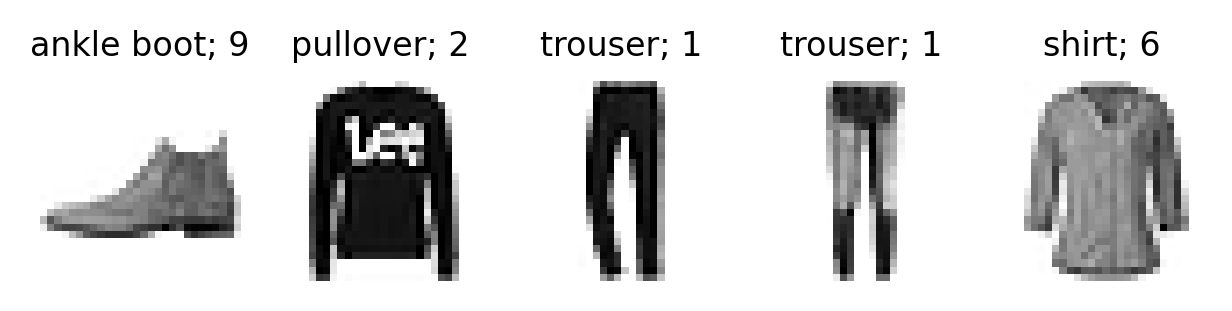

the label is 9; the prediction is 9
the label is 2; the prediction is 2
the label is 1; the prediction is 1
the label is 1; the prediction is 1
the label is 6; the prediction is 6


In [ ]:
plt.figure(dpi=300,figsize=(5,1))
for i in range(5):
 ax=plt.subplot(1,5, i + 1)
 img=test_set[i][0]
 label=test_set[i][1]
 img=img/2+0.5
 img=img.reshape(28, 28)
 plt.imshow(img, cmap="binary")
 plt.axis('off')
 plt.title(text_labels[label]+f"; {label}", fontsize=8)
plt.show()
for i in range(5):
 img,label = test_set[i]
 img=img.reshape(-1,28*28).to(device)
 pred=model(img)
 index_pred=torch.argmax(pred,dim=1)
 idx=index_pred.item()
 print(f"the label is {label}; the prediction is {idx}")